# Discription

There are some components that are combined to make the concrete. These components will affect the compressive strength of the concrete. 
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

# Import library and data

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot 

In [3]:
df= pd.read_csv('/Users/shencong/Concrete_Data.csv')

In [4]:
##This is the link of the dataset https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength/download

In [5]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [6]:
df.shape

(1030, 9)

## rename variables

In [7]:
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
        'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'concrete_compressive_strength'}
df.rename(columns=columns,inplace=True)

# Data analysis

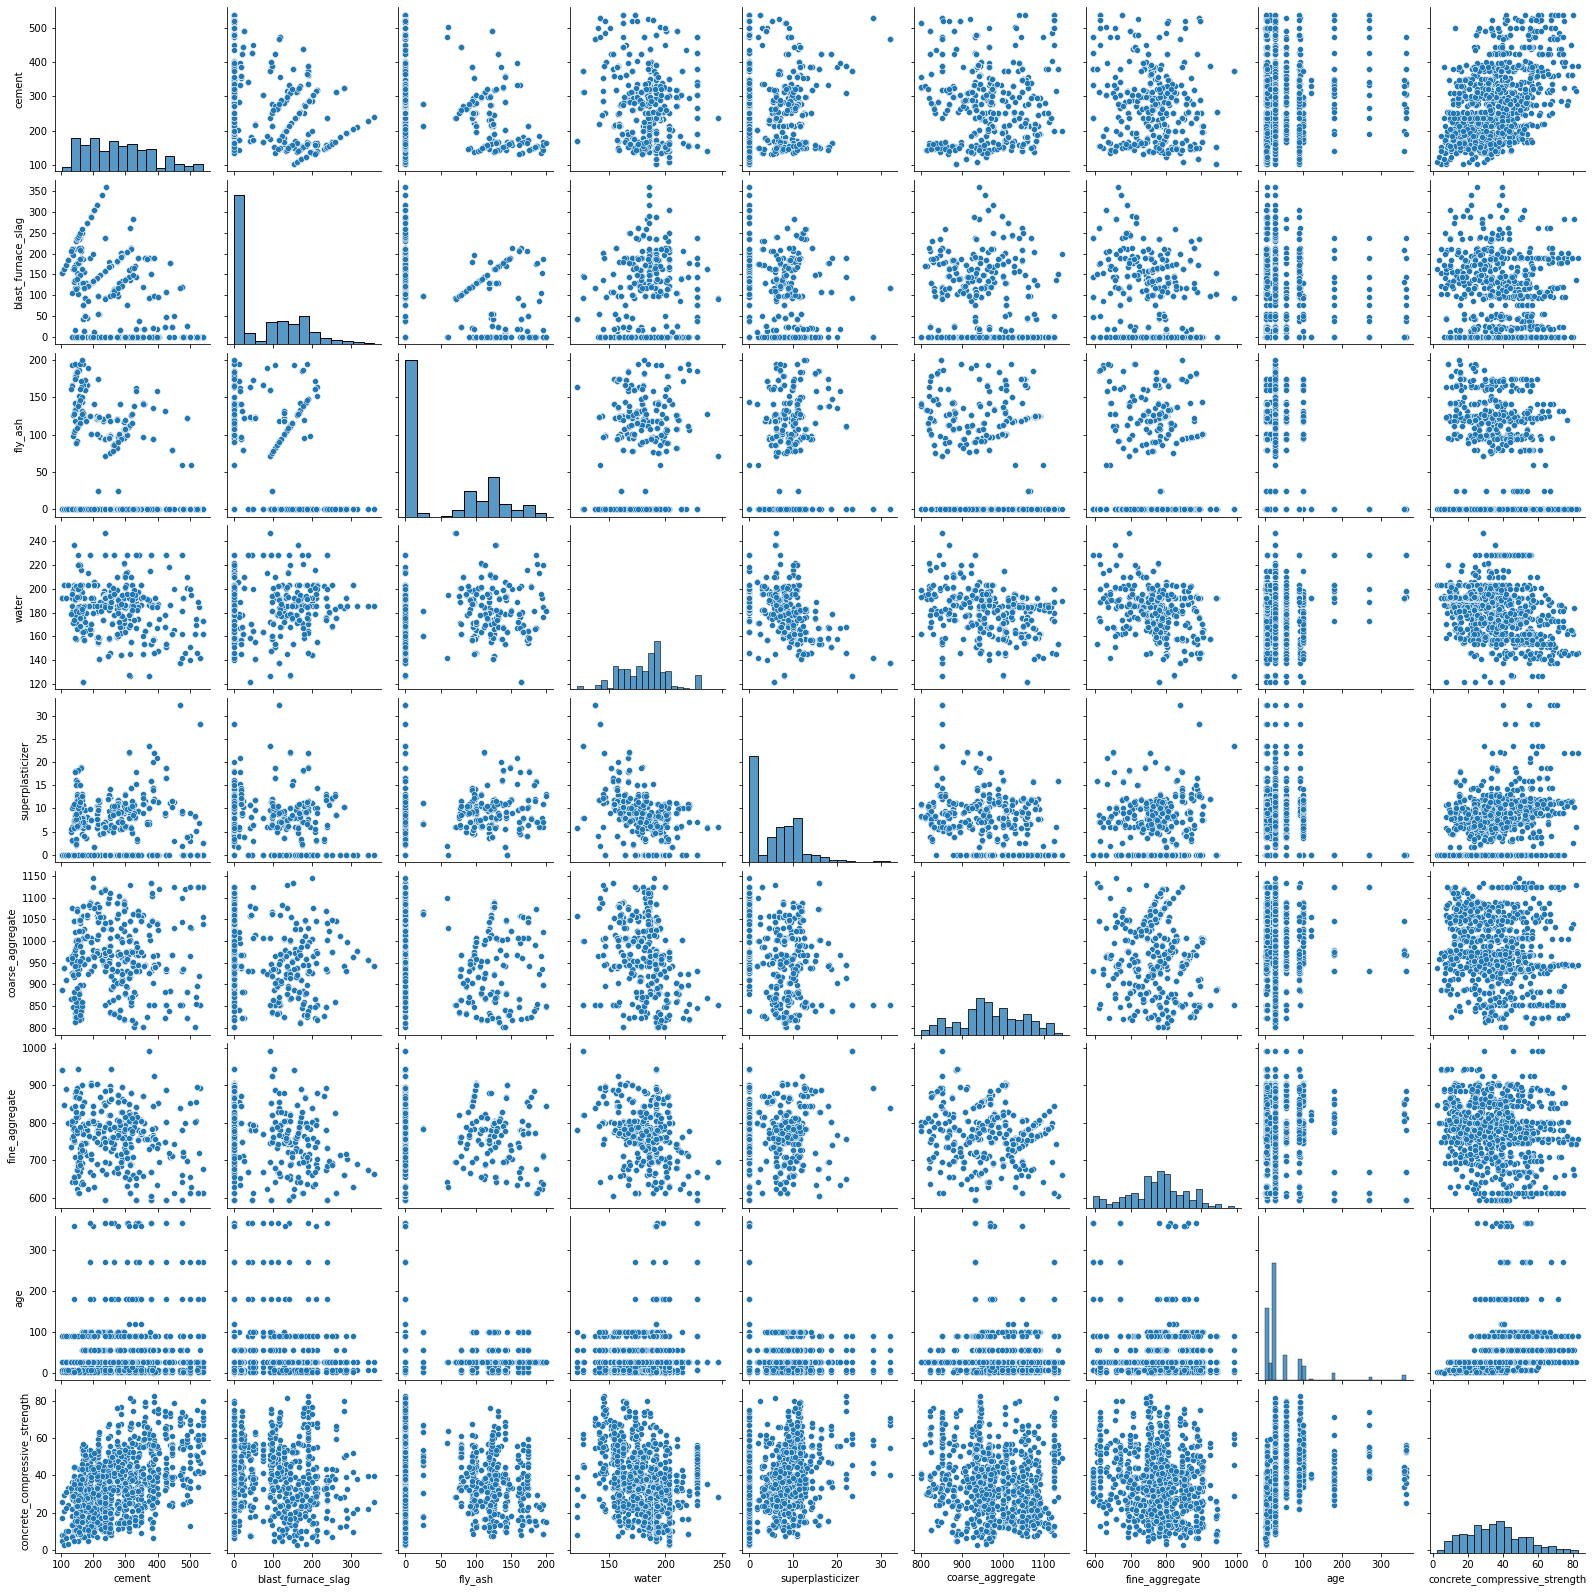

In [8]:
sns.pairplot(df)

# Normalization

In [9]:
cols = df.columns
sc = StandardScaler()
X = pd.DataFrame(columns=cols[:-1], data=sc.fit_transform(df.drop('concrete_compressive_strength',axis=1)))
display(X.head(3))
y = df['concrete_compressive_strength']
display(y.head(3))

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066


0    79.99
1    61.89
2    40.27
Name: concrete_compressive_strength, dtype: float64

## Split data

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Training and find the best model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [103]:
models=[LinearRegression(),
        Ridge(),
        SGDRegressor(penalty='l2'),
        LinearSVR(),KNeighborsRegressor(),
        DecisionTreeRegressor(),
        xgb.XGBRegressor(objective='reg:linear'),
        AdaBoostRegressor(),
        BaggingRegressor(),
        GradientBoostingRegressor(max_depth=1),
        RandomForestRegressor()
       ]
models_str=['linreg',
           'ridge',
           'sgd_reg',
           'svr',
           'knn',
           'dt',
           'xg_re',
           'ad',
           'br',
           'gbr',
           'rfr'
           ]
score_=[]

In [104]:
for model_name ,model in zip(models_str,models):
    print('Start training '+model_name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=model.score(X_test,y_test)
    score_.append(str(score))
    print(model_name+' score '+str(score))
df_score=pd.DataFrame([models_str])

Start training linreg
linreg score 0.5843252076779459
Start training ridge
ridge score 0.5851351545910406
Start training sgd_reg
sgd_reg score 0.5886949903599649
Start training svr
svr score 0.5543834190274985
Start training knn
knn score 0.7012700237316436
Start training dt
dt score 0.8003994308499839
Start training xg_re
[14:41:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
xg_re score 0.8963650875726702
Start training ad
ad score 0.7767596596692079
Start training br


/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


br score 0.8468256056472693
Start training gbr
gbr score 0.7840296439967752
Start training rfr
rfr score 0.8806078424847855


In [108]:
df=df_score.T
df['score']=score_
df=df.sort_values(by='score',ascending=False)
df=df.rename(columns={0:'name'})
df.set_index('name')
print(df)

       name               score
6     xg_re  0.8963650875726702
10      rfr  0.8806078424847855
8        br  0.8468256056472693
5        dt  0.8003994308499839
9       gbr  0.7840296439967752
7        ad  0.7767596596692079
4       knn  0.7012700237316436
2   sgd_reg  0.5886949903599649
1     ridge  0.5851351545910406
0    linreg  0.5843252076779459
3       svr  0.5543834190274985


In [38]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

In [54]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Extreme Gradient Boosting

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

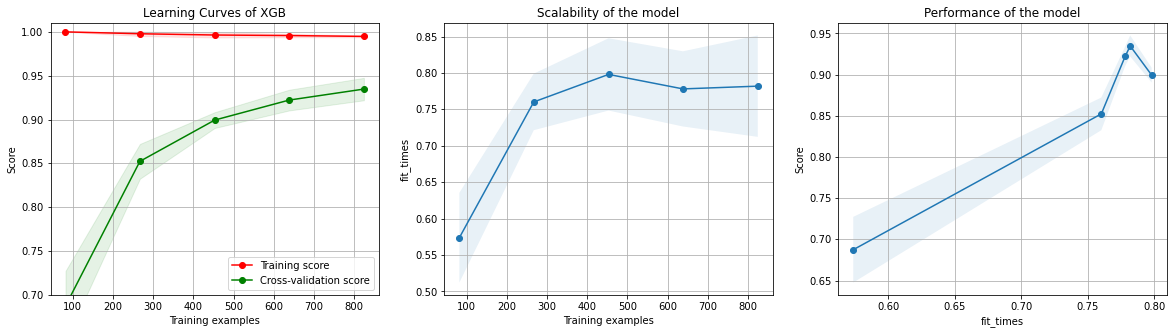

In [60]:
title = "Learning Curves of XGB"
estimator = xgb.XGBRegressor()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## Random Forest

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

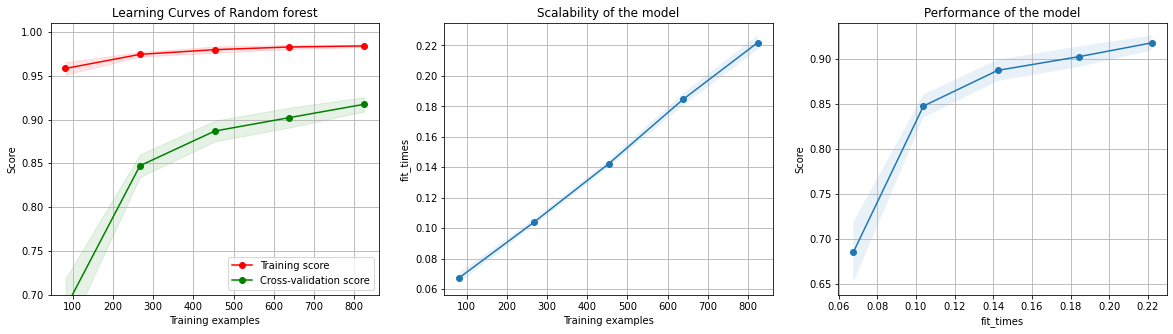

In [58]:
title = "Learning Curves of Random forest"
estimator = RandomForestRegressor()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## Bagging Regressor

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

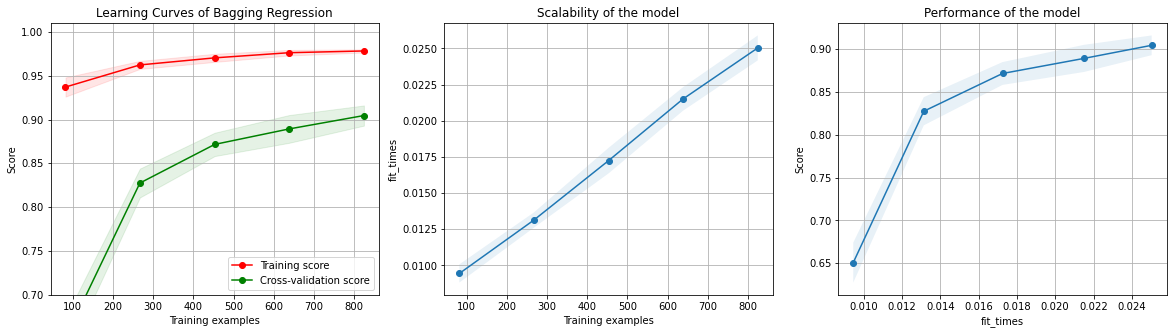

In [65]:
title = "Learning Curves of Bagging Regression"
estimator = BaggingRegressor()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

##  Gradient Boosting Regressor

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

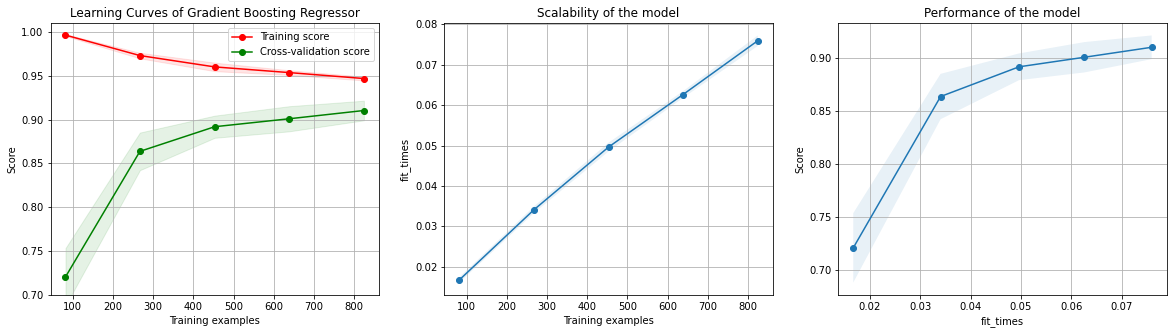

In [66]:
title = "Learning Curves of Gradient Boosting Regressor"
estimator = GradientBoostingRegressor()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## Linear regression

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

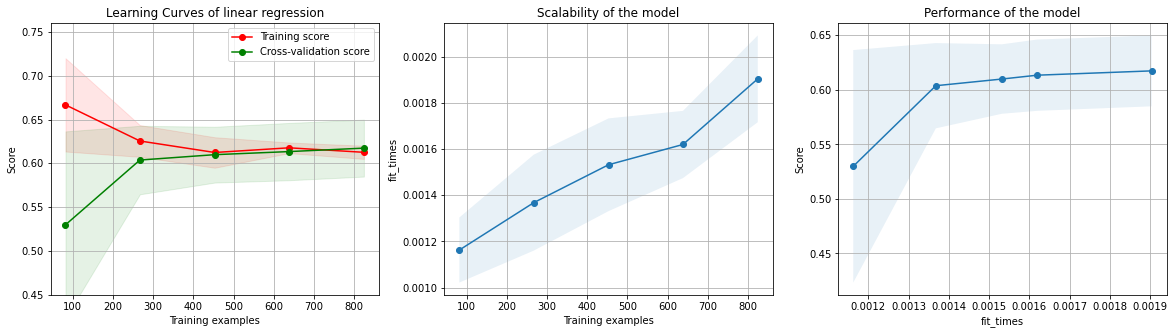

In [70]:
title = "Learning Curves of linear regression"
estimator = LinearRegression()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.45, 0.76), cv=cv, n_jobs=4)